In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from itertools import product
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load dataset 10

In [2]:
df = pd.read_csv('10_all_numerical.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155766 entries, 0 to 155765
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              155680 non-null  float64
 1   action_taken                              155766 non-null  int64  
 2   loan_type                                 155766 non-null  int64  
 3   lien_status                               155766 non-null  int64  
 4   reverse_mortgage                          155766 non-null  int64  
 5   open_end_line_of_credit                   155766 non-null  int64  
 6   loan_amount                               155766 non-null  int64  
 7   combined_loan_to_value_ratio              154641 non-null  float64
 8   interest_rate                             77802 non-null   float64
 9   total_loan_costs                          77806 non-null   float64
 10  origination_charges 

In [4]:
df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,9.003416e+09,3,2,1,2,2,115000,98.188,NaN,NaN,...,5,1,6,1,3.0,NaN,NaN,NaN,2.0,NaN
1,4.201710e+10,3,3,1,2,2,205000,110.256,NaN,NaN,...,2,7,4,1,5.0,NaN,5.0,NaN,2.0,2.0
2,3.401700e+10,3,1,1,2,2,205000,59.629,NaN,NaN,...,5,1,6,1,3.0,NaN,NaN,NaN,2.0,NaN
3,6.065043e+09,3,1,1,2,2,155000,64.990,NaN,NaN,...,5,4,6,1,5.0,NaN,NaN,NaN,2.0,NaN
4,3.711901e+10,3,1,1,2,2,255000,70.000,NaN,NaN,...,5,3,6,1,3.0,NaN,NaN,NaN,2.0,NaN


In [9]:
target_variable = "action_taken"

In [10]:
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [11]:
print(X.shape, y.shape)

(155766, 35) (155766,)


In [12]:
seed = 123

In [13]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state=seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

y_pred = model.predict(X)

Mean accuracy: 0.503 (0.011)


In [14]:
accuracy = accuracy_score(y, y_pred)

print(classification_report(y, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     77806
           3       0.50      1.00      0.67     77960

    accuracy                           0.50    155766
   macro avg       0.25      0.50      0.33    155766
weighted avg       0.25      0.50      0.33    155766



- for _class 1, precision is 0.80_, which means that _80%_ of the predictions for class 1 were correct, 
- and for _class 3, it's 0.00_, which means that _none_ of the predictions for class 3 were correct.

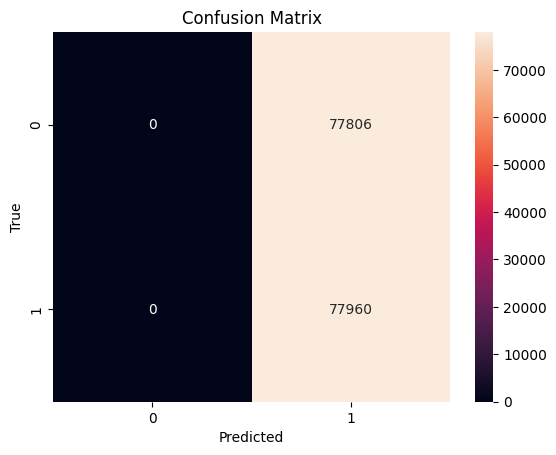

In [15]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

The model cant predict class 3!